# Table of Contents

01. Importing libraries
02. Importing data
03. Subsetting, wrangling, and cleaning time-series data
04. Time-series analysis: decomposition
05. Testing for stationarity
06. Stationarizing the data

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## 02. Importing data

In [2]:
# create a variable to store the main project folder path

path=r'/Users/tejas/Documents/CareerFoundry_DataAnalytics/Data Immersion/A6/Hotel Booking'

In [3]:
# import the cleaned data set

df=pd.read_pickle(os.path.join(path,'Data','Prepared Data','hotel_booking_cleaned.pkl'))

In [4]:
df.head()

,hotel,is_canceled,lead_time,cancellation_rate,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,32.56,2015,July,27,1,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,69,34.82,2015,July,27,1,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,12.75,2015,July,27,1,0,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,20.26,2015,July,27,1,0,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,21.43,2015,July,27,1,0,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.shape

(86916, 31)

## 03. Subsetting, wrangling, and cleaning time-series data

#### There is no need to subset the data as we only have bookings for Jul 2015 to Aug 2017 and its not a large time period.

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'cancellation_rate',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'kids', 'guest_type', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# converting string month to numerical (Dec = 12, Jan = 1, etc.)

arrival_month_num = pd.to_datetime(df.arrival_date_month, format='%B').dt.month

In [8]:
arrival_month_num

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 86916, dtype: int64

In [9]:
# creating the arrival date column by concatenating date component columns

df['arrival_date'] = pd.to_datetime((df['arrival_date_year'].map(str) + "-" +
                                     pd.to_datetime(df.arrival_date_month, format='%B').dt.month.map(str) + "-" +
                                     df['arrival_date_day_of_month'].map(str)),yearfirst=True)

In [10]:
df['arrival_date'].describe()

count                   86916
unique                    793
top       2017-04-29 00:00:00
freq                      237
first     2015-07-01 00:00:00
last      2017-08-31 00:00:00
Name: arrival_date, dtype: object

In [11]:
# narrowing down the dataset to columns of interest

df_year = df.groupby('arrival_date').agg({'cancellation_rate' : ['mean']})

In [12]:
df_year.columns

MultiIndex([('cancellation_rate', 'mean')],
           )

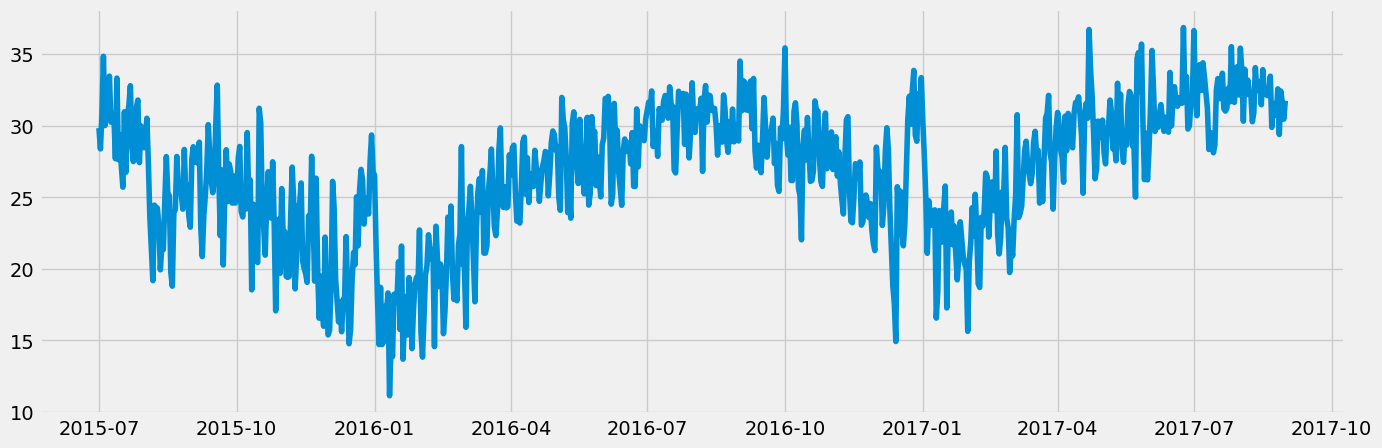

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_year)

In [14]:
# Check for missing values

df_year.isnull().sum() 

cancellation_rate  mean    0
dtype: int64

In [15]:
# Check for duplicates

dups = df_year.duplicated()
dups.sum()

# No dups!

0

## 04. Time-series analysis: decomposition

In [16]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_year, model='additive')

In [17]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

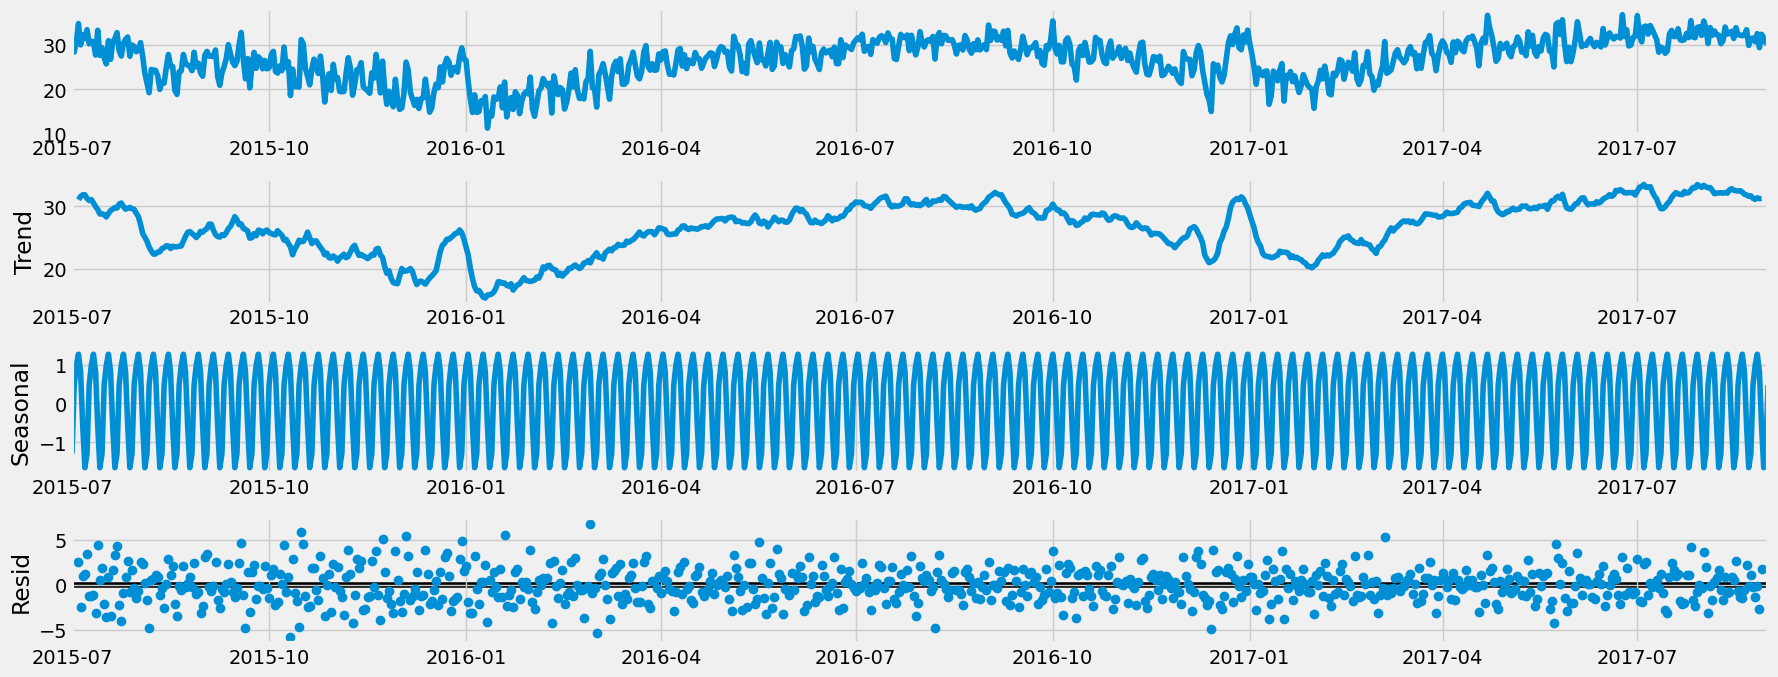

In [18]:
# Plot the separate components

decomposition.plot()
plt.show()

#### The first chart in the figure above is the data itself (including all of its components). This is called the level.

#### The second is the underlying trend. The trend line differs from the level indicating that there are fluctuations and noise in the data set as it is not smoothed. The trend in the chart above appears to have an inverted U-shape. It peaks around mid-year, indicating highest cancellation rates in the summer months of June, July and August. After summer, there is a gradual drop followed by a sudden jump around December, after which it drops and gradually increases again from March.

#### The third component is the seasonality. We can see seasonal fluctuations represented by a spikey curve that changes at many regular intervals.

#### The third component is the residual. We can see that there is a lot of noise, especially in 2015 and early-2016. This noise could be attributed to the extreme high and low cancellation rates in some cases.

#### Since the date range is a bit shorter, it is harder to see overall trends. For example, it would've been better if the data existed for the complete cycle starting from early 2015 to 2017.

## 05. Testing for stationarity

#### Conduct Dickey Fuller Test to test stationarity of data. A time series needs to be stationary before any forecasts can be applied. The Dickey Fuller Test will check for the presence of a unit root. If a unit root is present the data is non-stationary.
#### Null hypothesis: The data contains a unit root. Alternative hypothesis: The data does not contain a unit root.

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_year['cancellation_rate'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.684603
p-value                          0.439062
Number of Lags Used             21.000000
Number of Observations Used    771.000000
Critical Value (1%)             -3.438860
Critical Value (5%)             -2.865296
Critical Value (10%)            -2.568770
dtype: float64


#### The p-value of 0.439062 in the results above is greater than 0.05. The “Critical Value (5%)” has a value of -2.865296, which is smaller than the test statistic -1.684603. This means that we can't reject the null hypothesis. Meaning there is a unit root in the data, and the data is non-stationary.

#### The test for autocorrelation shows all lines going above the blue edge of the confidence interval. We can therefore deduce there are lags that are significantly correlated with each other. This confirms there’s a lot of autocorrelated data and the set is non-stationary, which supports the result of the Dickey-Fuller test we just conducted.

#### I will go ahead with differencing to try and make the data more stationary.

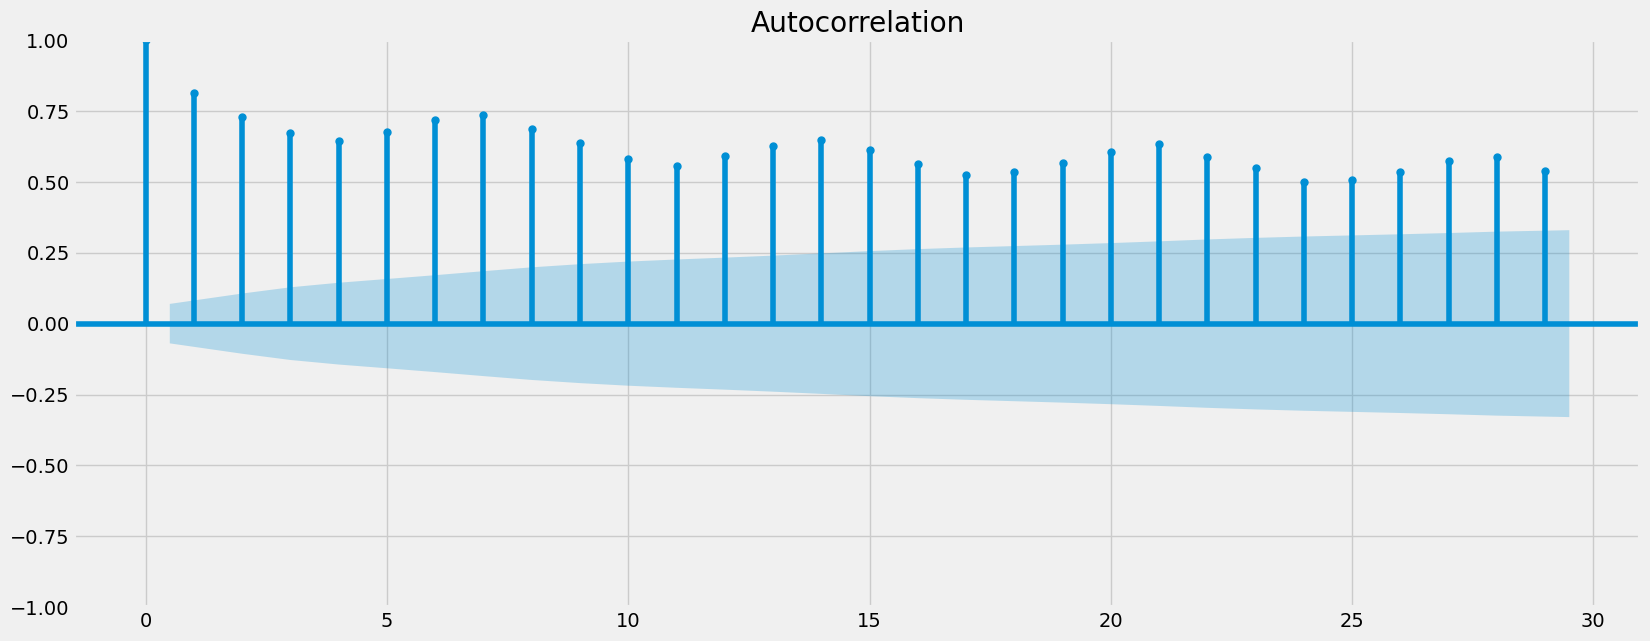

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_year)
plt.show()

## 06. Stationarizing the data

In [23]:
data_diff = df_year - df_year.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [24]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [25]:
data_diff.head()

,cancellation_rate
,mean
arrival_date,
2015-07-02,-1.449092
2015-07-03,2.433638
2015-07-04,4.029510
2015-07-05,-4.835577
2015-07-06,2.274941


In [26]:
data_diff.columns

MultiIndex([('cancellation_rate', 'mean')],
           )

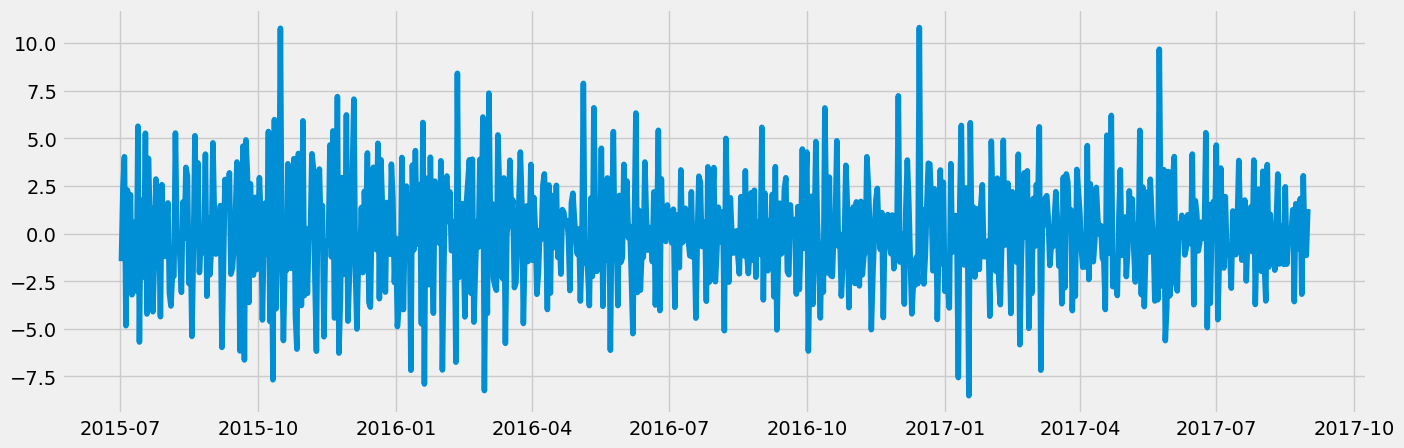

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
# re-run Dickey Fuller

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.966751e+00
p-value                        7.951087e-15
Number of Lags Used            2.000000e+01
Number of Observations Used    7.710000e+02
Critical Value (1%)           -3.438860e+00
Critical Value (5%)           -2.865296e+00
Critical Value (10%)          -2.568770e+00
dtype: float64


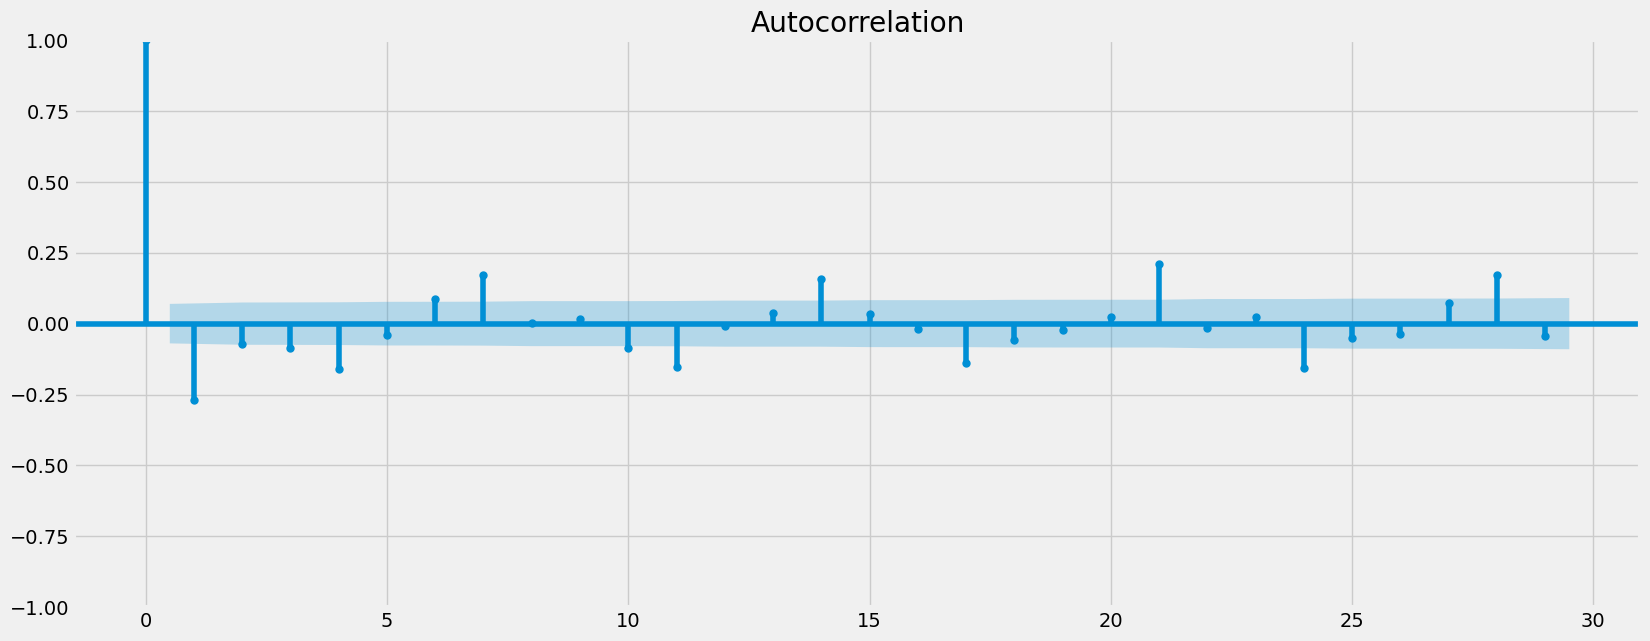

In [29]:
# re-run auto correlation

plot_acf(data_diff)
plt.show()

#### The test statistic is now much smaller than the critical value at all three significance levels. The p-value is also smaller than 0.05. This means we can reject the null hypothesis and, as a result, consider the series stationary. This also seems to have reduced the number of lines above the confidence interval in the auto correlation analysis to an extent.